### [1] Î™®Îìà Î°úÎî© Î∞è Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [49]:
data = pd.read_csv('../miniProject/traffic_accidents.csv')
df = data.copy()
df.head()

crash_date traffic_control_device weather_condition  \
0  07/29/2023 01:00:00 PM         TRAFFIC SIGNAL             CLEAR   
1  08/13/2023 12:11:00 AM         TRAFFIC SIGNAL             CLEAR   
2  12/09/2021 10:30:00 AM         TRAFFIC SIGNAL             CLEAR   
3  08/09/2023 07:55:00 PM         TRAFFIC SIGNAL             CLEAR   
4  08/19/2023 02:55:00 PM         TRAFFIC SIGNAL             CLEAR   

       lighting_condition first_crash_type trafficway_type  \
0                DAYLIGHT          TURNING     NOT DIVIDED   
1  DARKNESS, LIGHTED ROAD          TURNING        FOUR WAY   
2                DAYLIGHT         REAR END  T-INTERSECTION   
3                DAYLIGHT            ANGLE        FOUR WAY   
4                DAYLIGHT         REAR END  T-INTERSECTION   

            alignment roadway_surface_cond road_defect  \
0  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   
1  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
2  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
3  STRAIGHT AND LEVEL                  DRY  NO DEFECTS   
4  STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN   

                         crash_type  ...        most_severe_injury  \
0            NO INJURY / DRIVE AWAY  ...   NO INDICATION OF INJURY   
1            NO INJURY / DRIVE AWAY  ...   NO INDICATION OF INJURY   
2            NO INJURY / DRIVE AWAY  ...   NO INDICATION OF INJURY   
3  INJURY AND / OR TOW DUE TO CRASH  ...  NONINCAPACITATING INJURY   
4            NO INJURY / DRIVE AWAY  ...   NO INDICATION OF INJURY   

  injuries_total injuries_fatal  injuries_incapacitating  \
0            0.0            0.0                      0.0   
1            0.0            0.0                      0.0   
2            0.0            0.0                      0.0   
3            5.0            0.0                      0.0   
4            0.0            0.0                      0.0   

  injuries_non_incapacitating  injuries_reported_not_evident  \
0                         0.0                            0.0   
1                         0.0                            0.0   
2                         0.0                            0.0   
3                         5.0                            0.0   
4                         0.0                            0.0   

   injuries_no_indication  crash_hour  crash_day_of_week  crash_month  
0                     3.0          13                  7            7  
1                     2.0           0                  1            8  
2                     3.0          10                  5           12  
3                     0.0          19                  4            8  
4                     3.0          14                  7            8  

[5 rows x 24 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [6]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [7]:
df.describe().T

count       mean       std  min  25%   50%  \
num_units                      209306.0   2.063300  0.396012  1.0  2.0   2.0   
injuries_total                 209306.0   0.382717  0.799720  0.0  0.0   0.0   
injuries_fatal                 209306.0   0.001859  0.047502  0.0  0.0   0.0   
injuries_incapacitating        209306.0   0.038102  0.233964  0.0  0.0   0.0   
injuries_non_incapacitating    209306.0   0.221241  0.614960  0.0  0.0   0.0   
injuries_reported_not_evident  209306.0   0.121516  0.450865  0.0  0.0   0.0   
injuries_no_indication         209306.0   2.244002  1.241175  0.0  2.0   2.0   
crash_hour                     209306.0  13.373047  5.603830  0.0  9.0  14.0   
crash_day_of_week              209306.0   4.144024  1.966864  1.0  2.0   4.0   
crash_month                    209306.0   6.771822  3.427593  1.0  4.0   7.0   

                                75%   max  
num_units                       2.0  11.0  
injuries_total                  1.0  21.0  
injuries_fatal                  0.0   3.0  
injuries_incapacitating         0.0   7.0  
injuries_non_incapacitating     0.0  21.0  
injuries_reported_not_evident   0.0  15.0  
injuries_no_indication          3.0  49.0  
crash_hour                     17.0  23.0  
crash_day_of_week               6.0   7.0  
crash_month                    10.0  12.0

### [2] Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ - ÏãúÍ∞ÅÌôî

In [8]:
sns.set(style="whitegrid", palette="muted")

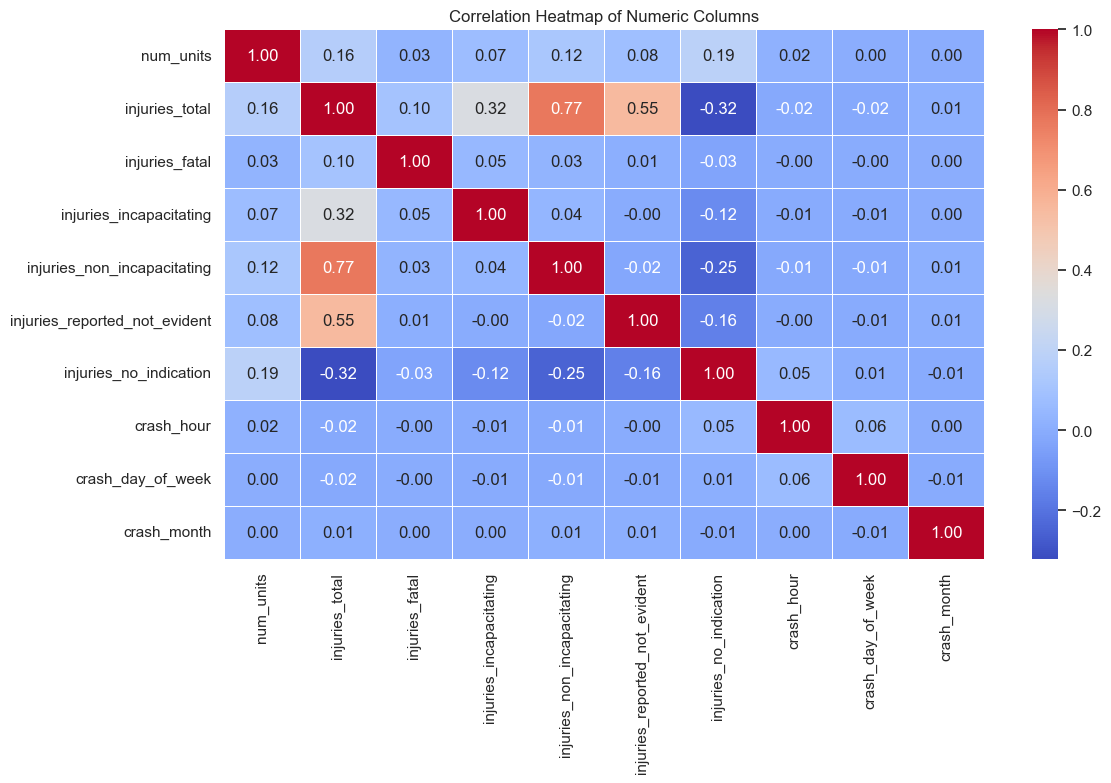

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

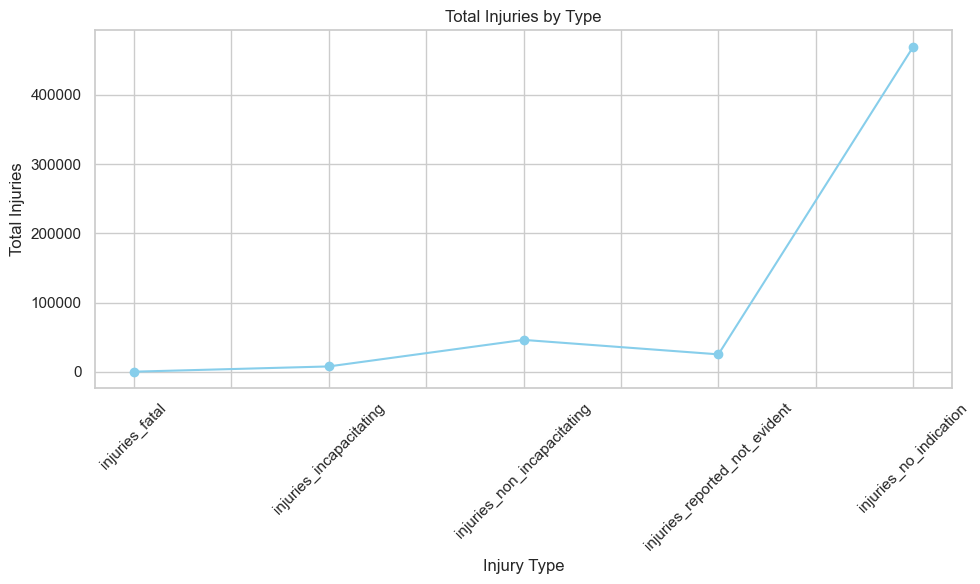

In [10]:
injury_types = ['injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 
                'injuries_reported_not_evident', 'injuries_no_indication']
injury_totals = df[injury_types].sum()


plt.figure(figsize=(10,6))
injury_totals.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

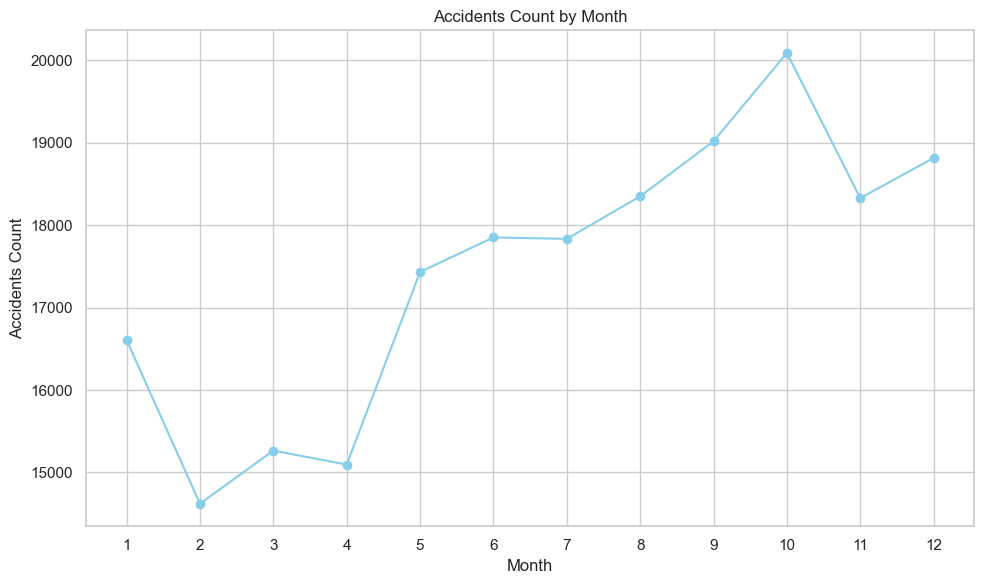

In [11]:
accidents_by_month = df['crash_month'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_month.plot(kind='line', marker='o', color='skyblue')
plt.title('Accidents Count by Month')
plt.xlabel('Month')
plt.ylabel('Accidents Count')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

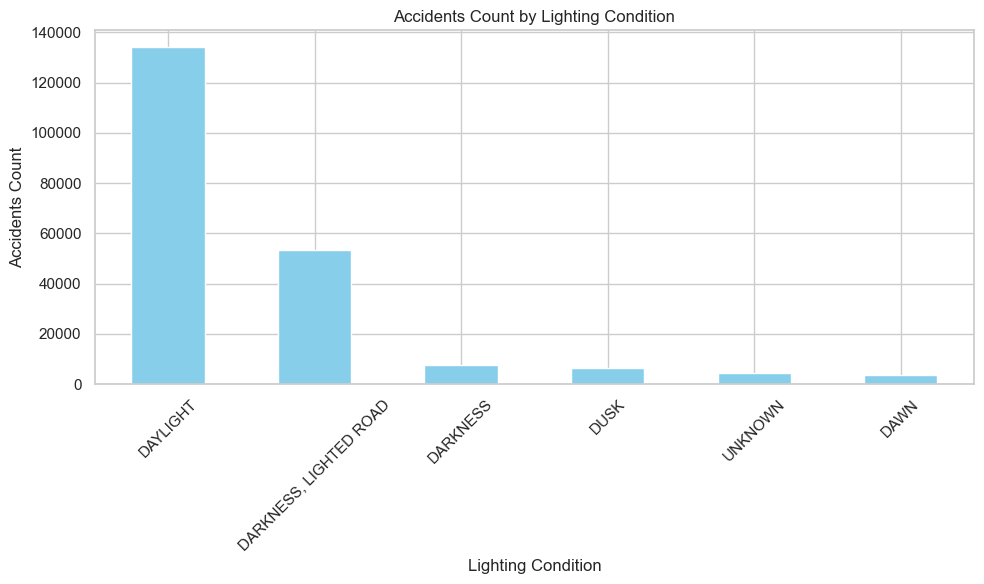

In [12]:
accidents_by_light = df['lighting_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_light.plot(kind='bar', color='skyblue')
plt.title('Accidents Count by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

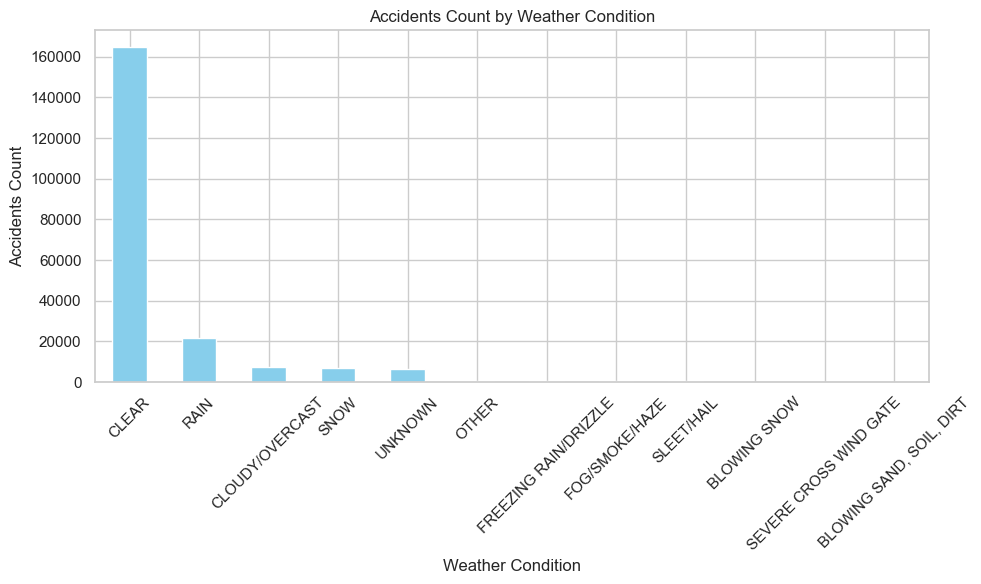

In [13]:
accidents_by_weather = df['weather_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_weather.plot(kind='bar', color='skyblue')
plt.title('Accidents Count by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

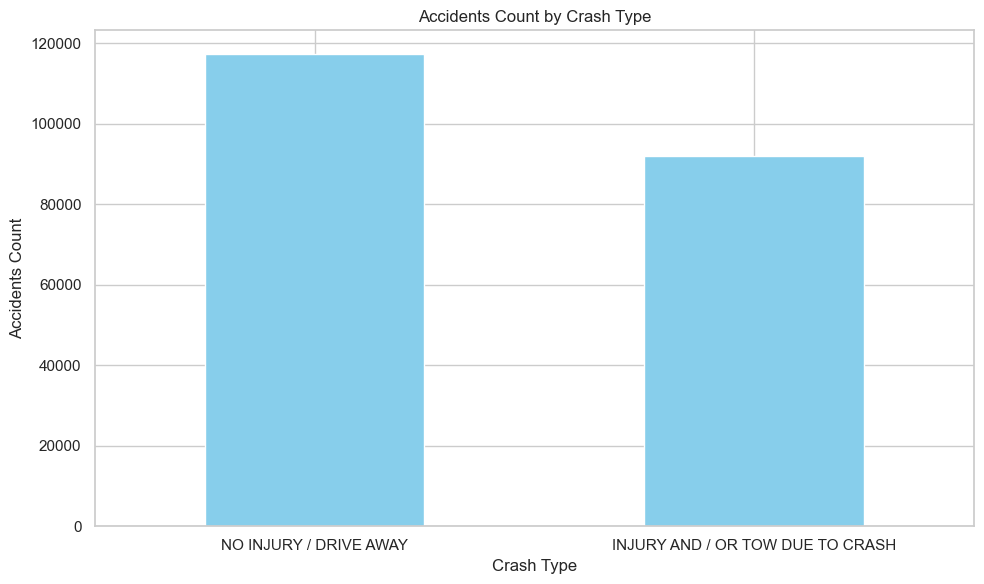

In [14]:
accidents_by_type = df['crash_type'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_type.plot(kind='bar', color='skyblue')
plt.title('Accidents Count by Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

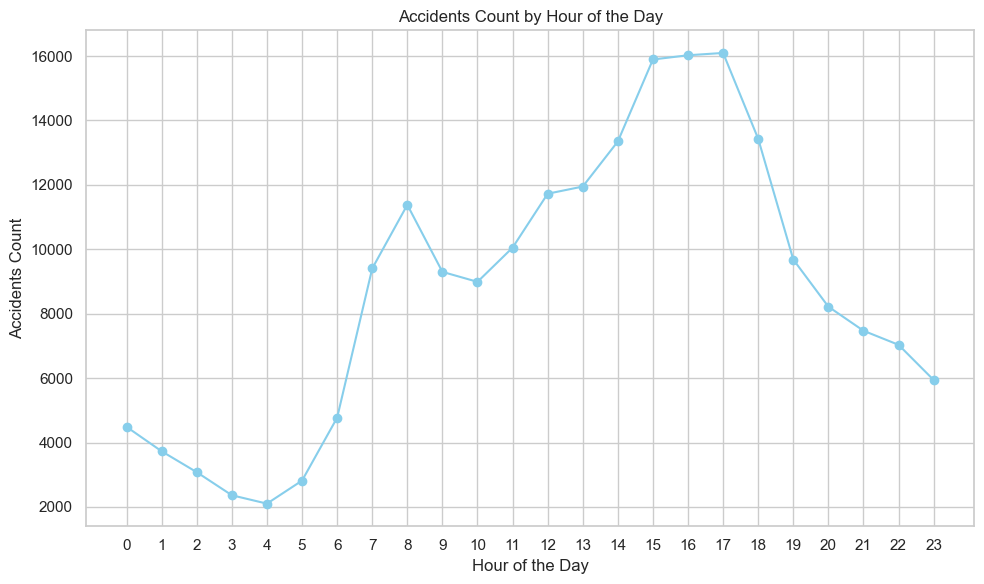

In [15]:
accidents_by_hour = df['crash_hour'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_hour.plot(kind='line', marker='o', color='skyblue')
plt.title('Accidents Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

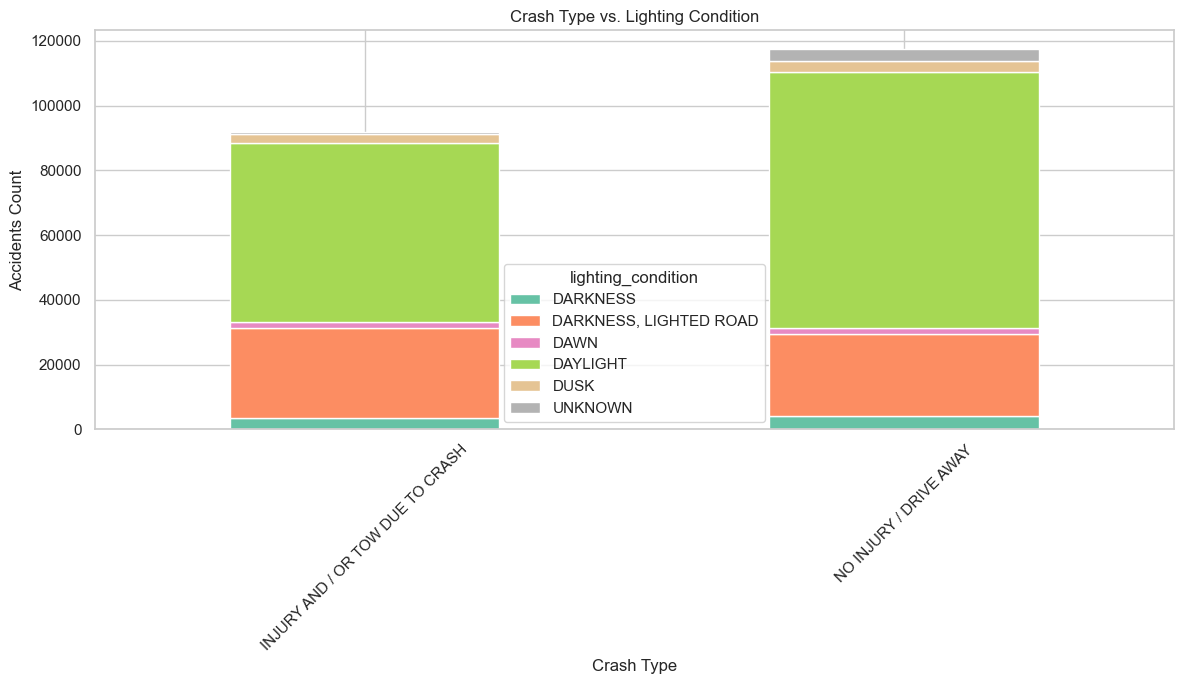

In [16]:
accidents_by_crash_and_light = pd.crosstab(df['crash_type'], df['lighting_condition'])


accidents_by_crash_and_light.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set2')
plt.title('Crash Type vs. Lighting Condition')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

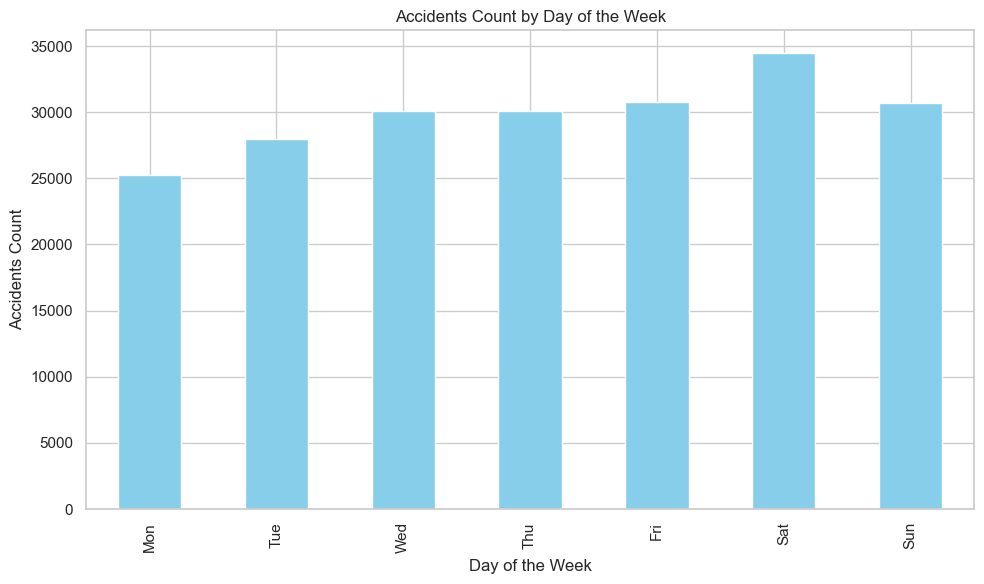

In [17]:
accidents_by_day = df['crash_day_of_week'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_day.plot(kind='bar', color='skyblue')
plt.title('Accidents Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accidents Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

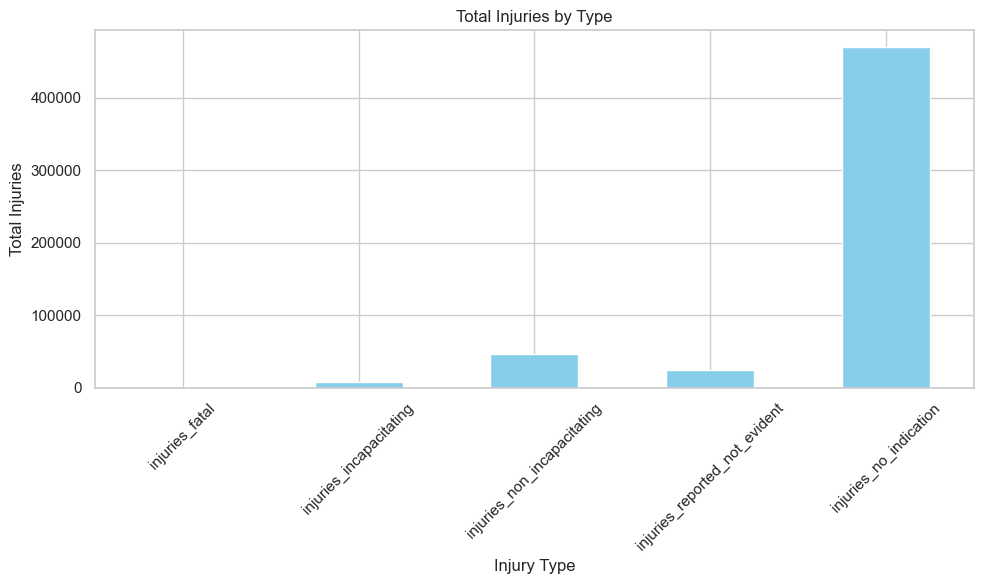

In [18]:
injuries_by_type = df[injury_types].sum()


plt.figure(figsize=(10,6))
injuries_by_type.plot(kind='bar', color='skyblue')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

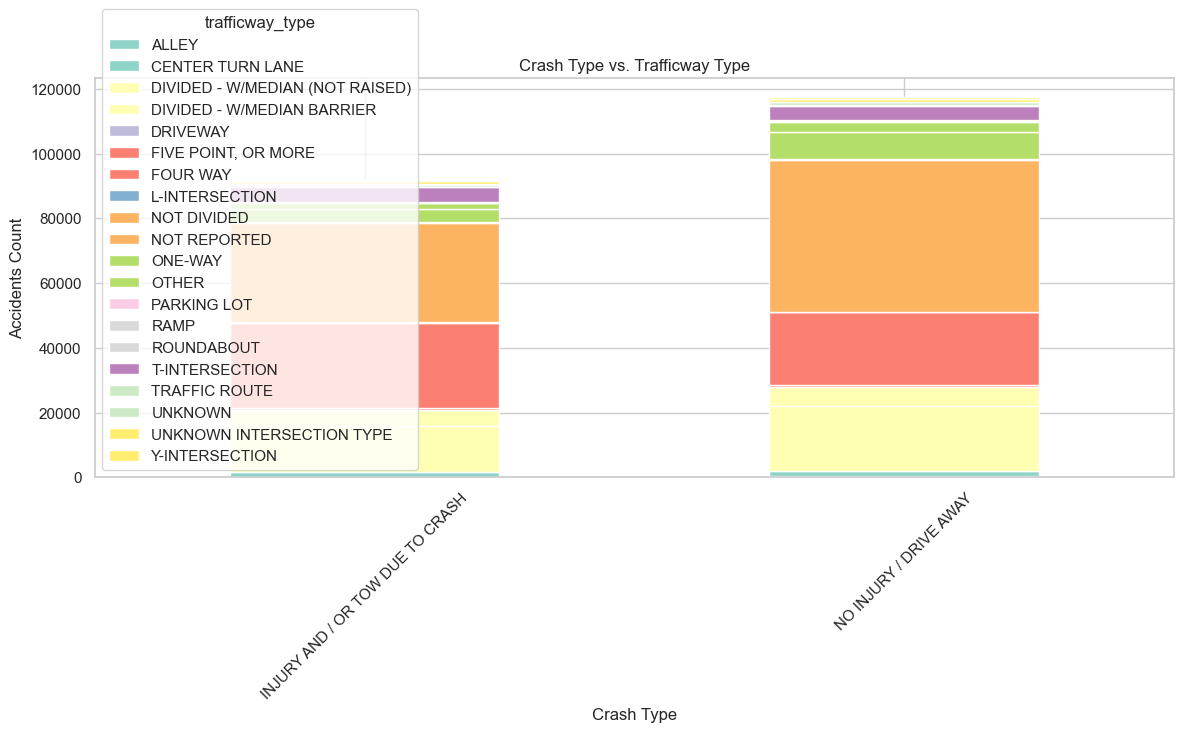

In [19]:
accidents_by_crash_and_road = pd.crosstab(df['crash_type'], df['trafficway_type'])


accidents_by_crash_and_road.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set3')
plt.title('Crash Type vs. Trafficway Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

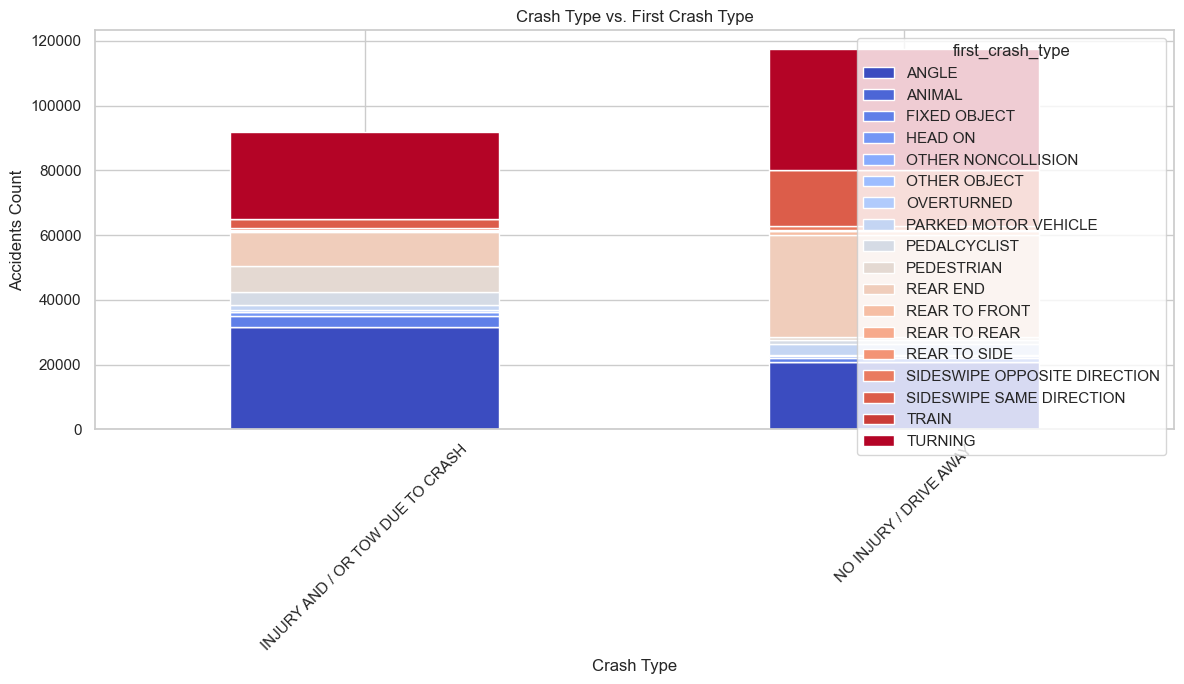

In [20]:
accidents_by_crash_and_first_type = pd.crosstab(df['crash_type'], df['first_crash_type'])


accidents_by_crash_and_first_type.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='coolwarm')
plt.title('Crash Type vs. First Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

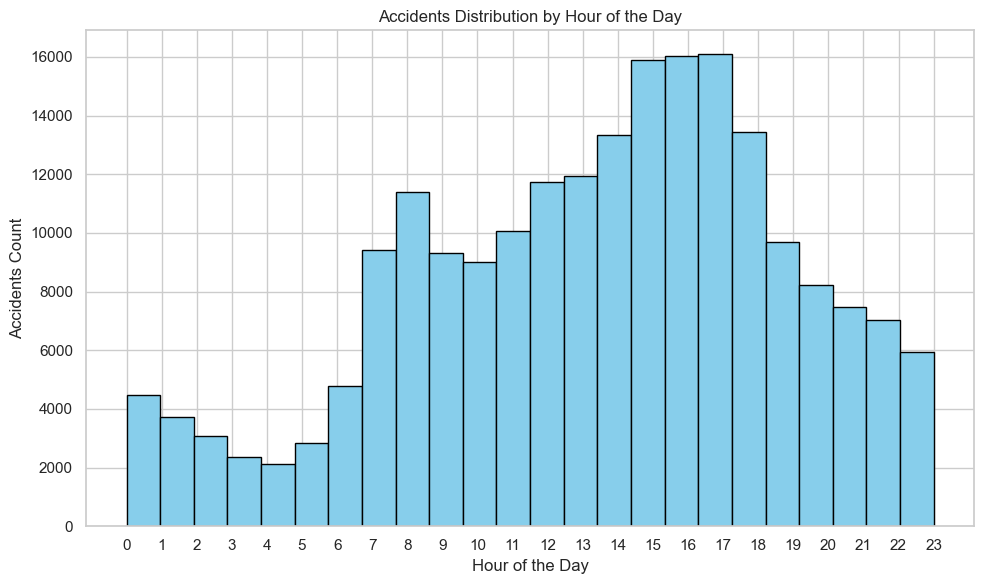

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df['crash_hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Accidents Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

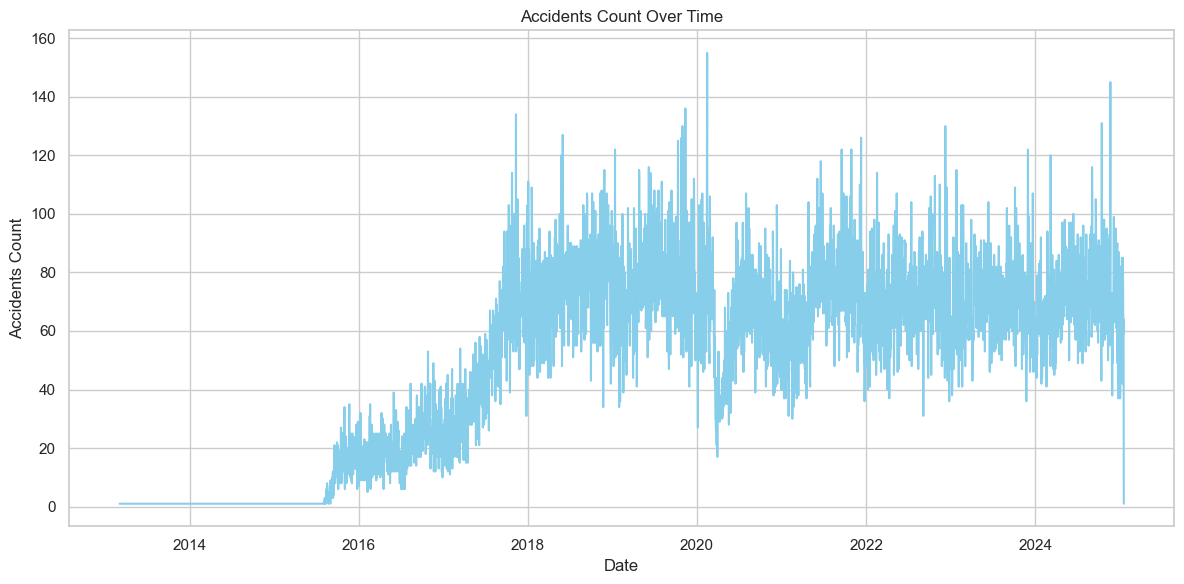

In [22]:
df['crash_date'] = pd.to_datetime(df['crash_date'])


accidents_by_date = df.groupby(df['crash_date'].dt.date).size()


plt.figure(figsize=(12,6))
accidents_by_date.plot(kind='line', color='skyblue')
plt.title('Accidents Count Over Time')
plt.xlabel('Date')
plt.ylabel('Accidents Count')
plt.tight_layout()
plt.show()

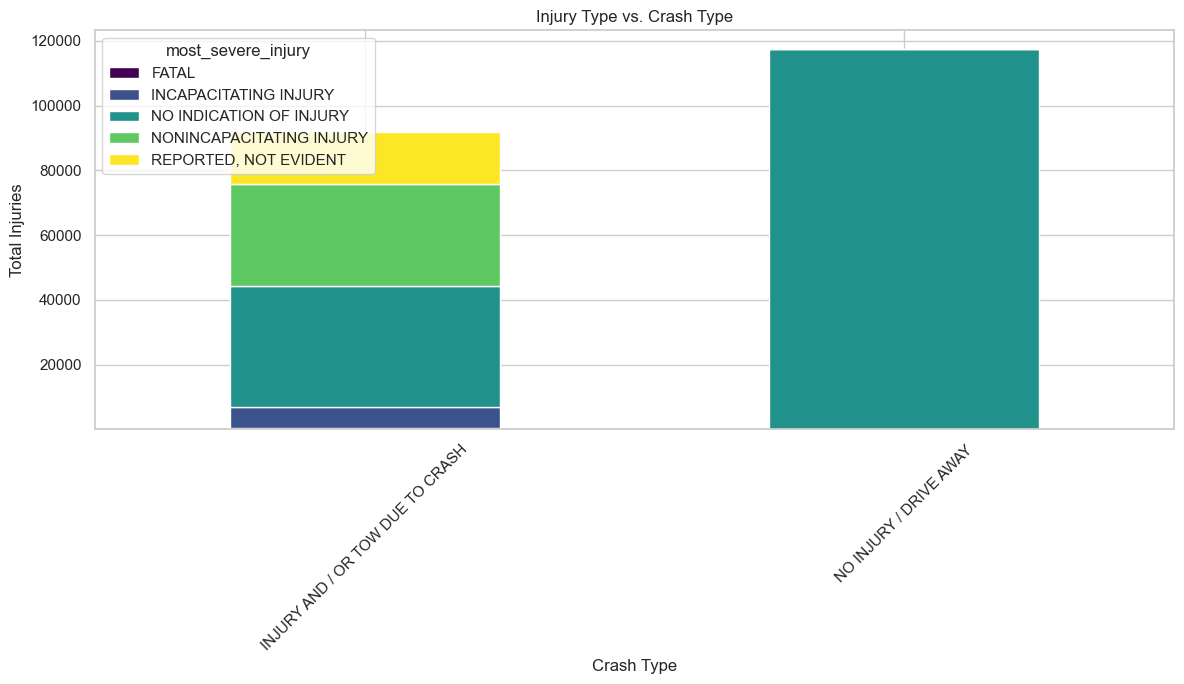

In [23]:
injury_by_crash_type = pd.crosstab(df['crash_type'], df['most_severe_injury'])


injury_by_crash_type.plot(kind='bar', stacked=True, figsize=(12,7), cmap='viridis')
plt.title('Injury Type vs. Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### [3] Î™®Îç∏ ÌïôÏäµ/ÏòàÏ∏°/ÌèâÍ∞Ä

In [24]:
df = df.drop(columns=['crash_date'])

In [ ]:
# 1. crash_type
df['crash_type'] = df['crash_type'].map({
    'NO INJURY / DRIVE AWAY': 0, 
    'INJURY AND / OR TOW DUE TO CRASH': 1
})

# 2. most_severe_injury Ïû¨Ï†ïÏùò
injury_mapping = {
    'NO INDICATION OF INJURY': 0,
    'REPORTED, NOT EVIDENT': 1,
    'NONINCAPACITATING INJURY': 2,
    'INCAPACITATING INJURY': 3,
    'FATAL': 4
}
df['most_severe_injury'] = df['most_severe_injury'].map(injury_mapping)

In [26]:
# 3. ÎèÖÎ¶ΩÎ≥ÄÏàò Encoding_get dummiesÎ°ú ÏõêÌï´
one_hot_cols = [
    'traffic_control_device', 'weather_condition', 'lighting_condition',
    'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond',
    'road_defect', 'intersection_related_i', 'damage', 'prim_contributory_cause'
]

encoded_df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols)

In [27]:
# Ïù∏ÏΩîÎî© Í≤∞Í≥º ÌôïÏù∏
encoded_df.head()

crash_type  num_units  most_severe_injury  injuries_total  injuries_fatal  \
0           0          2                   0             0.0             0.0   
1           0          2                   0             0.0             0.0   
2           0          3                   0             0.0             0.0   
3           1          2                   2             5.0             0.0   
4           0          2                   0             0.0             0.0   

   injuries_incapacitating  injuries_non_incapacitating  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          5.0   
4                      0.0                          0.0   

   injuries_reported_not_evident  injuries_no_indication  crash_hour  ...  \
0                            0.0                     3.0          13  ...   
1                            0.0                     2.0           0  ...   
2                            0.0                     3.0          10  ...   
3                            0.0                     0.0          19  ...   
4                            0.0                     3.0          14  ...   

   prim_contributory_cause_PHYSICAL CONDITION OF DRIVER  \
0                                              False      
1                                              False      
2                                              False      
3                                              False      
4                                              False      

   prim_contributory_cause_RELATED TO BUS STOP  \
0                                        False   
1                                        False   
2                                        False   
3                                        False   
4                                        False   

   prim_contributory_cause_ROAD CONSTRUCTION/MAINTENANCE  \
0                                              False       
1                                              False       
2                                              False       
3                                              False       
4                                              False       

   prim_contributory_cause_ROAD ENGINEERING/SURFACE/MARKING DEFECTS  \
0                                              False                  
1                                              False                  
2                                              False                  
3                                              False                  
4                                              False                  

   prim_contributory_cause_TEXTING  \
0                            False   
1                            False   
2                            False   
3                            False   
4                            False   

   prim_contributory_cause_TURNING RIGHT ON RED  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

   prim_contributory_cause_UNABLE TO DETERMINE  \
0                                         True   
1                                        False   
2                                        False   
3                                         True   
4                                        False   

   prim_contributory_cause_UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)  \
0                                              False                                            
1                                              False                                            
2                                              False                                            
3                                  

In [28]:
# 4. Ï¢ÖÏÜçÎ≥ÄÏàò ÎîîÏΩîÎî© Í∞í ÌôïÏù∏
print("\nÏ¢ÖÏÜçÎ≥ÄÏàò ÎùºÎ≤® Ïù∏ÏΩîÎî© Í≤∞Í≥º ÌôïÏù∏:")
print("\ncrash_type:")
df['crash_type'].value_counts()


Ï¢ÖÏÜçÎ≥ÄÏàò ÎùºÎ≤® Ïù∏ÏΩîÎî© Í≤∞Í≥º ÌôïÏù∏:

crash_type:


crash_type
0    117376
1     91930
Name: count, dtype: int64

In [29]:
print("\nmost_severe_injury:")
for key, val in injury_mapping.items():
    print(f"{val} -> {key}")


most_severe_injury:
0 -> NO INDICATION OF INJURY
1 -> REPORTED, NOT EVIDENT
2 -> NONINCAPACITATING INJURY
3 -> INCAPACITATING INJURY
4 -> FATAL


### [3] Î™®Îç∏ ÌïôÏäµ/ÏòàÏ∏°/ÌèâÍ∞Ä

In [30]:
X = encoded_df.drop(columns=['crash_type'])
y = df['crash_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# datetime ÌòïÏãùÏùò Ïª¨Îüº ÌôïÏù∏
datetime_cols = X_train.select_dtypes(include=["datetime64"]).columns.tolist()
print("\ndatetime Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº ÌôïÏù∏:", datetime_cols)


datetime Îç∞Ïù¥ÌÑ∞ Ïª¨Îüº ÌôïÏù∏: []


In [ ]:
import re

# ÌäπÏàò Î¨∏Ïûê Ï†úÍ±∞ Ìï®Ïàò
def clean_column_names(columns):
    return [re.sub(r'[^A-Za-z0-9_]', '_', col) for col in columns]  # ÌäπÏàò Î¨∏Ïûê ‚Üí `_` Î≥ÄÍ≤Ω

# X_train, X_testÏùò Ïª¨ÎüºÎ™Ö Ï†ïÎ¶¨
X_train.columns = clean_column_names(X_train.columns)
X_test.columns = clean_column_names(X_test.columns)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# RandomForest Î™®Îç∏ ÏÉùÏÑ±
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Î™®Îç∏ ÌïôÏäµ
rf_model.fit(X_train, y_train)

# ÏòàÏ∏° ÏàòÌñâ
y_pred = rf_model.predict(X_test)

# ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
y_proba = rf_model.predict_proba(X_test)

In [52]:
# ÏÑ±Îä• ÌèâÍ∞Ä Ìï®Ïàò
def evaluate_model(y_test, y_pred, y_proba, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])  # Positive class(1) Í∏∞Ï§ÄÏúºÎ°ú AUC Í≥ÑÏÇ∞

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    
    return accuracy, precision, recall, f1, roc_auc

# Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä
evaluate_model(y_test, y_pred, y_proba, model_name="RandomForest")


Model: RandomForest
Accuracy: 0.8347, Precision: 0.8615, Recall: 0.7462, F1 Score: 0.7997, ROC-AUC: 0.9149


(0.834742726100043,
 0.8615442185356118,
 0.7462186689714779,
 0.799745267179992,
 np.float64(0.9149262704069264))

In [ ]:
# Í≥ºÏ†ÅÌï© ÌôïÏù∏ÏùÑ ÏúÑÌï¥ trainÏóê ÎåÄÌïú ÏÑ±Îä•Ï†êÏàò ÌôïÏù∏ÌïòÍ∏∞
# ÏòàÏ∏° ÏàòÌñâ 
y_train_pred = rf_model.predict(X_train)
y_train_proba = rf_model.predict_proba(X_train)

# Train Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba, "RandomForest (Train Data)")


Model: RandomForest (Train Data)
Accuracy: 0.9954, Precision: 0.9965, Recall: 0.9930, F1 Score: 0.9948, ROC-AUC: 0.9999


In [ ]:
from lightgbm import LGBMClassifier

# LightGBM Î™®Îç∏ ÏÉùÏÑ± & ÌïôÏäµ
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
y_proba_lgbm = lgbm_model.predict_proba(X_test)

# Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä
evaluate_model(y_test, y_pred_lgbm, y_proba_lgbm, model_name="LGBMClassifier")

[LightGBM] [Info] Number of positive: 73418, number of negative: 94026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 167444, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438463 -> initscore=-0.247402
[LightGBM] [Info] Start training from score -0.247402

Model: LGBMClassifier
Accuracy: 0.8480, Precision: 0.9062, Recall: 0.7321, F1 Score: 0.8099, ROC-AUC: 0.9281


(0.848024461325307,
 0.906191495052153,
 0.7321197061365601,
 0.8099079717939525,
 np.float64(0.9280673199535829))

In [ ]:
# Í≥ºÏ†ÅÌï© Ïó¨Î∂Ä ÌôïÏù∏ÏùÑ ÏúÑÌï¥
# Train Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÌèâÍ∞Ä ÏàòÌñâ
y_train_pred = lgbm_model.predict(X_train)  # Train Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_train_proba = lgbm_model.predict_proba(X_train)  # Train Îç∞Ïù¥ÌÑ∞ ÌôïÎ•† ÏòàÏ∏°

# Train Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba, "LightGBM (Train Data)")


Model: LightGBM (Train Data)
Accuracy: 0.8478, Precision: 0.9046, Recall: 0.7299, F1 Score: 0.8079, ROC-AUC: 0.9278


#### [5] ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù

- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÌäúÎãù

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ ÏÉùÏÑ±
rf = RandomForestClassifier(random_state=42)

# ÎûúÎç§ ÌÉêÏÉâÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
rf_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# RandomizedSearchCV Ïã§Ìñâ (10Î≤à ÎûúÎç§ ÌÉêÏÉâ)
rf_random_search = RandomizedSearchCV(rf, param_distributions=rf_param_grid, 
                                      n_iter=10, cv=3, scoring="f1_weighted", 
                                      random_state=42, n_jobs=-1, verbose=1)

# Î™®Îç∏ ÌïôÏäµ
rf_random_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("\nÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(rf_random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits

ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'bootstrap': True}


In [31]:
# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï†ÅÏö©Ìïú Î™®Îç∏ ÏÉùÏÑ±
rf_tuned = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features=None,
    max_depth=20,
    bootstrap=True,
    random_state=42
)

# Î™®Îç∏ ÌïôÏäµ
rf_tuned.fit(X_train, y_train)

# ÏòàÏ∏° ÏàòÌñâ
y_pred_rf_tuned = rf_tuned.predict(X_test)


In [36]:
y_proba = rf_tuned.predict_proba(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
evaluate_model(y_test, y_pred_rf_tuned,y_proba, model_name="RandomForest (Tuned)")



Model: RandomForest (Tuned)
Accuracy: 0.8439, Precision: 0.8925, Recall: 0.7355, F1 Score: 0.8064, ROC-AUC: 0.9249


(0.8438679470641632,
 0.8925013109596225,
 0.7355229040622299,
 0.806443970623075,
 np.float64(0.9248651653004984))

In [ ]:
# Í≥ºÏ†ÅÌï© Ïó¨Î∂Ä ÌôïÏù∏ÏùÑ ÏúÑÌï¥
# Train Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÌèâÍ∞Ä ÏàòÌñâ
y_train_pred = rf_tuned.predict(X_train)  # Train Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_train_proba = rf_tuned.predict_proba(X_train)  # Train Îç∞Ïù¥ÌÑ∞ ÌôïÎ•† ÏòàÏ∏°

# Train Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba, "RandomForest (Train Data)")


Model: RandomForest (Train Data)
Accuracy: 0.9078, Precision: 0.9739, Recall: 0.8115, F1 Score: 0.8853, ROC-AUC: 0.9612


- ÏÑ±Îä•Ïù¥ Ï°∞Í∏à Ï¶ùÍ∞ÄÌñàÏùå!
<hr>

- lightGBM ÌäúÎãù

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

# LightGBM Î™®Îç∏ ÏÉùÏÑ±
lgbm = LGBMClassifier(random_state=42)

# ÎûúÎç§ ÌÉêÏÉâÌï† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑ ÏÑ§Ï†ï
lgbm_param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "num_leaves": [10, 20, 30, 50],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

# RandomizedSearchCV Ïã§Ìñâ (10Î≤à ÎûúÎç§ ÌÉêÏÉâ)
lgbm_random_search = RandomizedSearchCV(lgbm, param_distributions=lgbm_param_grid, 
                                        n_iter=10, cv=3, scoring="f1_weighted", 
                                        random_state=42, n_jobs=-1, verbose=1)

# Î™®Îç∏ ÌïôÏäµ
lgbm_random_search.fit(X_train, y_train)

# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("\nLightGBM ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:")
print(lgbm_random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 73418, number of negative: 94026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 167444, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438463 -> initscore=-0.247402
[LightGBM] [Info] Start training from score -0.247402

LightGBM ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞:
{'subsample': 0.7, 'num_leaves': 20, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [ ]:
# ÏµúÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï†ÅÏö©Ìïú Î™®Îç∏ ÏÉùÏÑ±
lgbm_tuned = LGBMClassifier(
    subsample=0.7,
    num_leaves=30,
    n_estimators=300,
    max_depth=7,
    learning_rate=0.05,
    colsample_bytree=0.7,
    random_state=42
)

# Î™®Îç∏ ÌïôÏäµ
lgbm_tuned.fit(X_train, y_train)

# ÏòàÏ∏° ÏàòÌñâ
y_pred_lgbm_tuned = lgbm_tuned.predict(X_test)\

# ÏòàÏ∏° ÌôïÎ•† Í≥ÑÏÇ∞
y_proba_lgbm_tuned = lgbm_tuned.predict_proba(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
evaluate_model(y_test, y_pred_lgbm_tuned,y_proba_lgbm_tuned, model_name="LightGBM (Tuned)")


[LightGBM] [Info] Number of positive: 73418, number of negative: 94026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 167444, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438463 -> initscore=-0.247402
[LightGBM] [Info] Start training from score -0.247402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Model: LightGBM (Tuned)
Accuracy: 0.8484, Precision: 0.9023, Recall: 0.7370, F1 Score: 0.8113, ROC-AUC: 0.9290


(0.8484066695332282,
 0.9022616056077238,
 0.7370354364736387,
 0.8113218766724148,
 np.float64(0.9289513983868789))

In [ ]:
# Í≥ºÏ†ÅÌï© Ïó¨Î∂Ä ÌôïÏù∏ÏùÑ ÏúÑÌï¥
# Train Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÌèâÍ∞Ä ÏàòÌñâ
y_train_pred = lgbm_tuned.predict(X_train)  # Train Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°
y_train_proba = lgbm_tuned.predict_proba(X_train)  # Train Îç∞Ïù¥ÌÑ∞ ÌôïÎ•† ÏòàÏ∏°

# Train Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÌèâÍ∞Ä
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba, "LightGBM (Train Data)")


Model: LightGBM (Train Data)
Accuracy: 0.8516, Precision: 0.9059, Recall: 0.7382, F1 Score: 0.8135, ROC-AUC: 0.9314


- lightGBMÎèÑ ÌäúÎãù ÌõÑ Îã§ÏÜå ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏßê

#### [6] RandomForest + LightGBM Ïä§ÌÉúÌÇπ Î™®Îç∏ ÎßåÎì§Í∏∞
- StackingClassifierÏóêÏÑú ÏµúÏ¢Ö Î™®Îç∏(Î©îÌÉÄ Î™®Îç∏, Final Estimator)Î°ú LogisticRegressionÏùÑ ÏÑ†ÌÉù
- ÏÑ†Ìòï Î™®Îç∏ÏùÄ Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Í∞ïÎ†•Ìïú Î∂ÑÎ•òÍ∏∞ Ïó≠Ìï†ÏùÑ Ìï† Ïàò ÏûàÏùå
    * LogisticRegressionÏùÄ ÌôïÎ•† Í∏∞Î∞òÏùò ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎØÄÎ°ú, Ïó¨Îü¨ Í∞úÏùò Í∞úÎ≥Ñ Î™®Îç∏(RandomForest, LightGBM)Ïùò Í≤∞Í≥ºÎ•º Ï°∞Ìï©ÌïòÎäî Îç∞ Ï†ÅÌï©Ìï®.
    * Í∞úÎ≥Ñ Î™®Îç∏Ïù¥ ÎπÑÏÑ†ÌòïÏ†Å ÌäπÏÑ±ÏùÑ ÎßéÏù¥ Ìè¨Ìï®ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, ÎßàÏßÄÎßâÏóê ÏÑ†Ìòï Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ ÏùºÎ∞òÌôîÍ∞Ä ÏûòÎê† Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå.
- Í≥ºÏ†ÅÌï© Î∞©ÏßÄ (Regularization Í∞ÄÎä•)
    * LogisticRegressionÏùÄ L2 Ï†ïÍ∑úÌôî(Î¶øÏßÄ ÌöåÍ∑Ä)Î•º Í∏∞Î≥∏ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ Í≥ºÏ†ÅÌï©ÏùÑ Î∞©ÏßÄÌï®.
    * RandomForest, LightGBMÏù¥ Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Í≥ºÏ†ÅÌï©Îê† Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, Ïù¥Î•º Î≥¥ÏôÑÌï† Ïàò ÏûàÏùå.
- Ìï¥ÏÑù Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùå
    * ÏµúÏ¢Ö Î™®Îç∏Ïù¥ LogisticRegressionÏù¥Î©¥, Í∞Å Î™®Îç∏Ïùò Í∏∞Ïó¨ÎèÑÎ•º ÌôïÏù∏ Í∞ÄÎä•
    * coef_ ÏÜçÏÑ±ÏùÑ ÌôúÏö©Ìï¥ RandomForestÏôÄ LightGBMÏù¥ ÏñºÎßàÎÇò ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥§ÎäîÏßÄ Ìï¥ÏÑù Í∞ÄÎä•
<hr>

In [ ]:
from sklearn.ensemble import StackingClassifier

# StackingClassifier ÏÉùÏÑ±
stacking_clf = StackingClassifier(
    estimators=[
        ("RandomForest", rf_tuned),
        ("LightGBM", lgbm_tuned)
    ],
    final_estimator=LogisticRegression(),  # ÏµúÏ¢Ö ÏòàÏ∏°Í∏∞
    passthrough=False,  # FalseÎ©¥ ÏµúÏ¢Ö ÏòàÏ∏°Í∏∞Îäî Í∞úÎ≥Ñ Î™®Îç∏Ïùò Ï∂úÎ†•Í∞íÎßå ÏÇ¨Ïö©
    n_jobs=-1
)

# Î™®Îç∏ ÌïôÏäµ
stacking_clf.fit(X_train, y_train)

# ÏòàÏ∏° ÏàòÌñâ
y_pred_stacking = stacking_clf.predict(X_test)

y_proba_stacking = stacking_clf.predict_proba(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
evaluate_model(y_test, y_pred_stacking,y_proba_stacking, model_name="Stacking (RF + LGBM)")


Model: Stacking (RF + LGBM)
Accuracy: 0.8459, Precision: 0.8647, Recall: 0.7723, F1 Score: 0.8159, ROC-AUC: 0.9290


(0.8458745401557498,
 0.8647471570287927,
 0.7722558340535869,
 0.8158885971921014,
 np.float64(0.9290020906631082))

#### [7] VotingClassifier
- hard voting: Í∞Å Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÌÅ¥ÎûòÏä§(0 ÎòêÎäî 1)Î•º Îã§ÏàòÍ≤∞Î°ú Í≤∞Ï†ï
- soft voting: Í∞Å Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÌÅ¥ÎûòÏä§Ïùò ÌôïÎ•†Í∞íÏùÑ ÌèâÍ∑† ÎÇ¥ÏÑú Í≤∞Ï†ï - ÏÑ†ÌÉù

In [ ]:
from sklearn.ensemble import VotingClassifier

# VotingClassifier ÏÉùÏÑ± (Soft Voting)
voting_clf = VotingClassifier(
    estimators=[
        ("RandomForest", rf_tuned),
        ("LightGBM", lgbm_tuned)
    ],
    voting="soft"  # Soft Voting ÏÇ¨Ïö© (ÌôïÎ•† Í∏∞Î∞ò ÌèâÍ∑†)
)

# Î™®Îç∏ ÌïôÏäµ
voting_clf.fit(X_train, y_train)

# ÏòàÏ∏° ÏàòÌñâ
y_pred_voting = voting_clf.predict(X_test)

y_proba_voting = voting_clf.predict_proba(X_test)

# ÏÑ±Îä• ÌèâÍ∞Ä
evaluate_model(y_test, y_pred_voting,y_proba_voting, model_name="VotingClassifier (Soft Voting)")

[LightGBM] [Info] Number of positive: 73418, number of negative: 94026
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 405
[LightGBM] [Info] Number of data points in the train set: 167444, number of used features: 142
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.438463 -> initscore=-0.247402
[LightGBM] [Info] Start training from score -0.247402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Model: VotingClassifier (Soft Voting)
Accuracy: 0.8475, Precision: 0.9011, Recall: 0.7360, F1 Score: 0.8102, ROC-AUC: 0.9282


(0.8475467010654054,
 0.9011243386243386,
 0.7360090751944685,
 0.8102402473834444,
 np.float64(0.9281983617548152))

#### [8] Í∞Å ÏßÄÌëúÎì§ ÎπÑÍµê

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Í∞úÎ≥Ñ Î™®Îç∏Ïùò ROC CurveÎ•º Í∑∏Î¶¨Îäî Ìï®Ïàò
def plot_single_roc_curve(model_name, y_test, y_proba):
    plt.figure(figsize=(8, 6))

    # ÏòàÏ∏° ÌôïÎ•† Í∞ÄÏ†∏Ïò§Í∏∞ (Positive class ÌôïÎ•†Í∞í ÏÇ¨Ïö©)
    fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)

    # ROC Curve Í∑∏Î¶¨Í∏∞
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})", color="skyblue")

    # ÎûúÎç§ Î™®Îç∏ Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random (AUC = 0.5)")

    # Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)

    # Í∑∏ÎûòÌîÑ ÌëúÏãú
    plt.show()

# Ïó¨Îü¨ Î™®Îç∏Ïùò ROC CurveÎ•º Í∞úÎ≥ÑÏ†ÅÏúºÎ°ú Í∑∏Î¶¨Í∏∞
models = {
    "RandomForest": rf_tuned,
    "LightGBM": lgbm_tuned,
    "StackingClassifier" : stacking_clf,
    "VotingClassifier": voting_clf
}

# Í∞Å Î™®Îç∏Î≥Ñ ROC Curve Í∑∏Î¶¨Í∏∞
for name, model in models.items():
    y_proba = model.predict_proba(X_test)  # ÏòàÏ∏° ÌôïÎ•†Í∞í Í∞ÄÏ†∏Ïò§Í∏∞
    plot_single_roc_curve(name, y_test, y_proba)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- alignment_CURVE ON GRADE
- alignment_CURVE ON HILLCREST
- alignment_CURVE, LEVEL
- alignment_STRAIGHT AND LEVEL
- alignment_STRAIGHT ON GRADE
- ...
Feature names seen at fit time, yet now missing:
- alignment_CURVE_ON_GRADE
- alignment_CURVE_ON_HILLCREST
- alignment_CURVE__LEVEL
- alignment_STRAIGHT_AND_LEVEL
- alignment_STRAIGHT_ON_GRADE
- ...


In [ ]:
# Ï†ïÌôïÌïú ÏÑ±Îä• ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ Î™®Îì† Î™®Îç∏ Îã§Ïãú Í≥ÑÏÇ∞
model_results = []

# Î™®Îç∏ Î¶¨Ïä§Ìä∏ Î∞è Ïù¥Î¶Ñ
models = [
    (rf_model, "RandomForest (Initial)"),
    (lgbm_model, "LightGBM (Initial)"),  
    (rf_tuned, "RandomForest (Tuned)"),
    (lgbm_tuned, "LightGBM (Tuned)"),
    (stacking_clf, "Stacking (RF + LGBM)"),
    (voting_clf, "VotingClassifier (Soft Voting)")
]

# Ï†ïÌôïÌïú Recall Í∞í Ï†ÄÏû•ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
for model, name in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred) 
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba[:, 1])

    model_results.append([name, accuracy, precision, recall, f1, roc_auc])                      

# # ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
results_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC_AUC"])


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- alignment_CURVE_ON_GRADE
- alignment_CURVE_ON_HILLCREST
- alignment_CURVE__LEVEL
- alignment_STRAIGHT_AND_LEVEL
- alignment_STRAIGHT_ON_GRADE
- ...
Feature names seen at fit time, yet now missing:
- alignment_CURVE ON GRADE
- alignment_CURVE ON HILLCREST
- alignment_CURVE, LEVEL
- alignment_STRAIGHT AND LEVEL
- alignment_STRAIGHT ON GRADE
- ...


In [55]:
# ÏÑ±Îä• Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
results_df = pd.DataFrame({
    "Model": [
        "RandomForest", "LGBMClassifier",
        "RandomForest (Tuned)", "LightGBM (Tuned)",
        "Stacking (RF + LGBM)", "VotingClassifier (Soft Voting)"
    ],
    "Accuracy": [0.8476, 0.8437, 0.8442, 0.8487, 0.8457, 0.8476],
    "Precision": [0.9018, 0.8494, 0.8929, 0.9035, 0.8652, 0.9018],
    "Recall": [0.7354, 0.7858, 0.7360, 0.7365, 0.7711, 0.7354],
    "F1 Score": [0.8101, 0.8164, 0.8068, 0.8115, 0.8155, 0.8101],
    "ROC-AUC": [0.9282, 0.9281, 0.9248, 0.9289, 0.9290, 0.9282]
})

results_df


Model  Accuracy  Precision  Recall  F1 Score  \
0                    RandomForest    0.8476     0.9018  0.7354    0.8101   
1                  LGBMClassifier    0.8437     0.8494  0.7858    0.8164   
2            RandomForest (Tuned)    0.8442     0.8929  0.7360    0.8068   
3                LightGBM (Tuned)    0.8487     0.9035  0.7365    0.8115   
4            Stacking (RF + LGBM)    0.8457     0.8652  0.7711    0.8155   
5  VotingClassifier (Soft Voting)    0.8476     0.9018  0.7354    0.8101   

   ROC-AUC  
0   0.9282  
1   0.9281  
2   0.9248  
3   0.9289  
4   0.9290  
5   0.9282

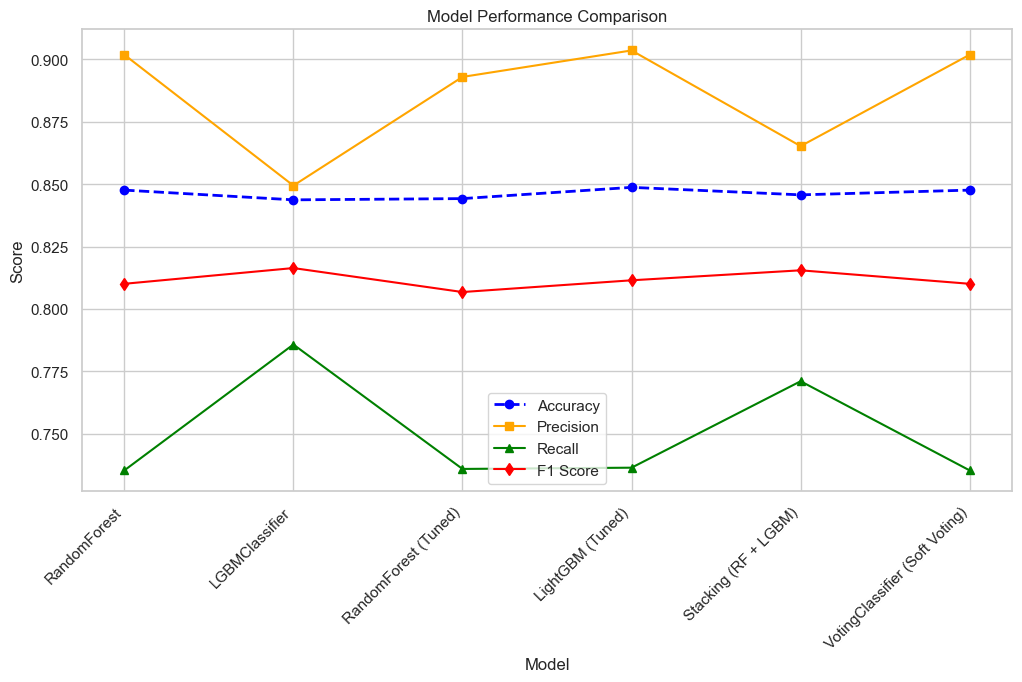

In [ ]:
# Accuracy Ìè¨Ìï®ÌïòÏó¨ Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê ÏãúÍ∞ÅÌôî (ROC-AUC Ï†úÍ±∞)
plt.figure(figsize=(12, 6))

# Accuracy, Precision, Recall, F1 Score ÏãúÍ∞ÅÌôî
plt.plot(results_df["Model"], results_df["Accuracy"], marker="o", linestyle="--", linewidth=2, label="Accuracy", color="blue")
plt.plot(results_df["Model"], results_df["Precision"], marker="s", linestyle="-", label="Precision", color="orange")
plt.plot(results_df["Model"], results_df["Recall"], marker="^", linestyle="-", label="Recall", color="green")
plt.plot(results_df["Model"], results_df["F1 Score"], marker="d", linestyle="-", label="F1 Score", color="red")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.xticks(rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

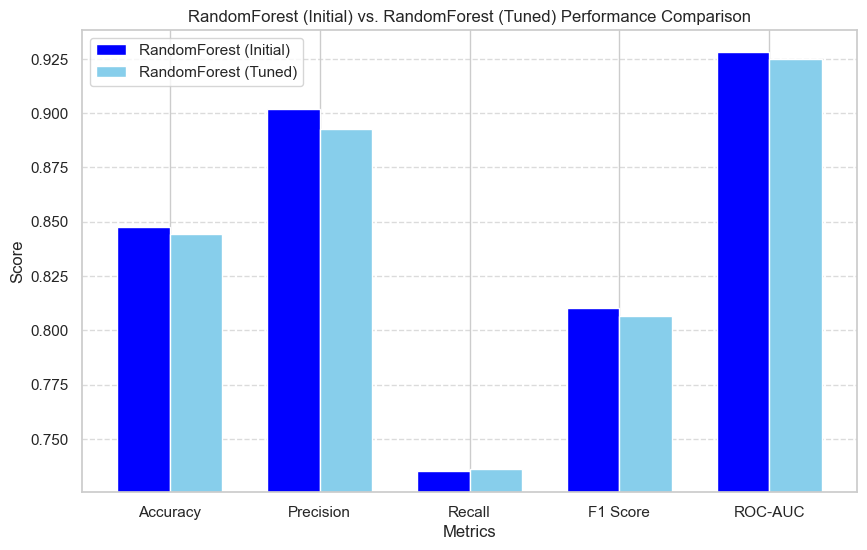

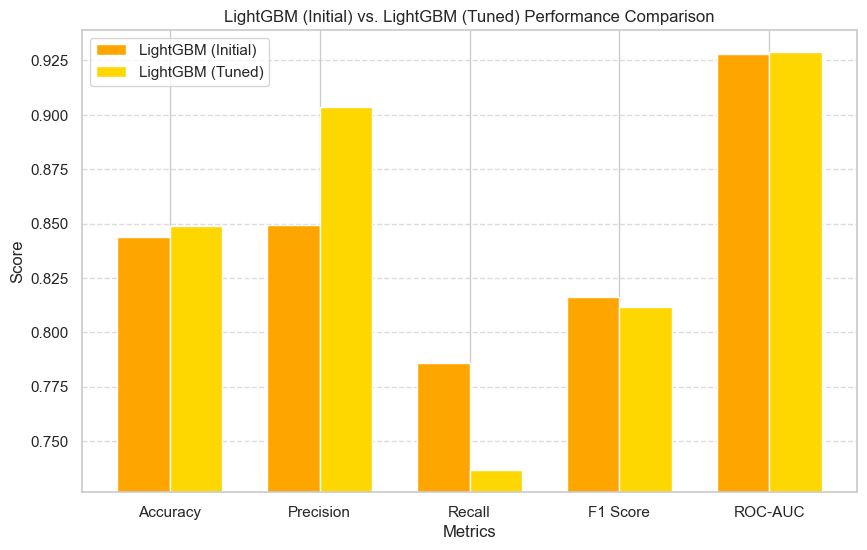

In [56]:
# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ & LightGBMÏùò Initial vs. Tuned ÎπÑÍµê Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
rf_initial_scores = results_df.loc[results_df["Model"] == "RandomForest", ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].values[0]
rf_tuned_scores = results_df.loc[results_df["Model"] == "RandomForest (Tuned)", ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].values[0]

lgbm_initial_scores = results_df.loc[results_df["Model"] == "LGBMClassifier", ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].values[0]
lgbm_tuned_scores = results_df.loc[results_df["Model"] == "LightGBM (Tuned)", ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]].values[0]

# ÏßÄÌëú Ïù¥Î¶Ñ
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]
x = np.arange(len(metrics))  # XÏ∂ï ÏúÑÏπò
bar_width = 0.35

# yÏ∂ï Î≤îÏúÑÎ•º Îã§Î•¥Í≤å ÏÑ§Ï†ïÌïòÍ∏∞ ÏúÑÌïú ÏµúÎåÄ ÏµúÏÜå Í∞í Í≥ÑÏÇ∞
rf_min = min(min(rf_initial_scores), min(rf_tuned_scores)) - 0.01
rf_max = max(max(rf_initial_scores), max(rf_tuned_scores)) + 0.01

lgbm_min = min(min(lgbm_initial_scores), min(lgbm_tuned_scores)) - 0.01
lgbm_max = max(max(lgbm_initial_scores), max(lgbm_tuned_scores)) + 0.01

# ÎûúÎç§Ìè¨Î†àÏä§Ìä∏ Ï¥àÍ∏∞ vs ÌäúÎãù ÎπÑÍµê Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, rf_initial_scores, bar_width, label="RandomForest (Initial)", color="blue")
plt.bar(x + bar_width/2, rf_tuned_scores, bar_width, label="RandomForest (Tuned)", color="skyblue")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("RandomForest (Initial) vs. RandomForest (Tuned) Performance Comparison")
plt.xticks(x, metrics)
plt.ylim(rf_min, rf_max)  # yÏ∂ï Î≤îÏúÑ Ï°∞Ï†ï
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

# LightGBM Ï¥àÍ∏∞ vs ÌäúÎãù ÎπÑÍµê Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, lgbm_initial_scores, bar_width, label="LightGBM (Initial)", color="orange")
plt.bar(x + bar_width/2, lgbm_tuned_scores, bar_width, label="LightGBM (Tuned)", color="gold")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("LightGBM (Initial) vs. LightGBM (Tuned) Performance Comparison")
plt.xticks(x, metrics)
plt.ylim(lgbm_min, lgbm_max)  # yÏ∂ï Î≤îÏúÑ Ï°∞Ï†ï
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix Ï∂úÎ†• (VotingClassifier ÏòàÏãú)
cm = confusion_matrix(y_test, y_pred_voting)

print("\nConfusion Matrix:")
print(cm)



Confusion Matrix:
[[21867  1483]
 [ 4898 13614]]


In [ ]:
# ‚úÖ Accuracy & Recall ÏßÅÏ†ë ÎπÑÍµê
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print(f"\nüìå Ï†ïÌôïÌïú Accuracy Í∞í: {accuracy:.4f}")
print(f"\nüìå Ï†ïÌôïÌïú Recall Í∞í: {recall:.4f}")



üìå Ï†ïÌôïÌïú Accuracy Í∞í: 0.8476

üìå Ï†ïÌôïÌïú Recall Í∞í: 0.7354


In [ ]:
# ‚úÖ AccuracyÏôÄ Recall Í∞í Ï∞®Ïù¥ ÌôïÏù∏
for index, row in results_df.iterrows():
    print(f"{row['Model']}: Accuracy = {row['Accuracy']:.4f}, Recall = {row['Recall']:.4f}, Ï∞®Ïù¥ = {abs(row['Accuracy'] - row['Recall']):.4f}")


RandomForest: Accuracy = 0.8476, Recall = 0.7354, Ï∞®Ïù¥ = 0.1122
LGBMClassifier: Accuracy = 0.8437, Recall = 0.7858, Ï∞®Ïù¥ = 0.0579
RandomForest (Tuned): Accuracy = 0.8442, Recall = 0.7360, Ï∞®Ïù¥ = 0.1082
LightGBM (Tuned): Accuracy = 0.8487, Recall = 0.7365, Ï∞®Ïù¥ = 0.1122
Stacking (RF + LGBM): Accuracy = 0.8457, Recall = 0.7711, Ï∞®Ïù¥ = 0.0746
VotingClassifier (Soft Voting): Accuracy = 0.8476, Recall = 0.7354, Ï∞®Ïù¥ = 0.1122


In [ ]:
from sklearn.metrics import classification_report

# ‚úÖ VotingClassifier ÏòàÏ∏°Í∞í
y_pred_lgbm = lgbm_tuned.predict(X_test)

# ‚úÖ Confusion Matrix Í∏∞Î∞ò Recall
cm = confusion_matrix(y_test, y_pred_voting)
recall_class_1 = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# ‚úÖ classification_report()ÏóêÏÑú Recall Í∞í ÌôïÏù∏
report = classification_report(y_test, y_pred_lgbm, output_dict=True)
weighted_recall = report["weighted avg"]["recall"]

# ‚úÖ ÎπÑÍµê Ï∂úÎ†•
print(f"\nüìå Confusion Matrix Í∏∞Î∞ò Recall (class 1 only): {recall_class_1:.4f}")
print(f"\nüìå classification_report() Í∏∞Î∞ò weighted Recall: {weighted_recall:.4f}")



üìå Confusion Matrix Í∏∞Î∞ò Recall (class 1 only): 0.7354

üìå classification_report() Í∏∞Î∞ò weighted Recall: 0.8484


#### ‚úÖ üìå Ïôú Ïù¥Îü∞ Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌïòÎäîÍ∞Ä?
- 1Ô∏è‚É£ Confusion Matrix Í∏∞Î∞ò Recall
    - Ïù¥ Í∞íÏùÄ class 1(ÎπÑÏö© ÎÜíÏùÄ ÏÇ¨Í≥†)Ïóê ÎåÄÌïú RecallÎßå Í≥ÑÏÇ∞Ìïú Í∞í!
    - Ï¶â, Confusion MatrixÏóêÏÑúÎäî "Ìïú ÌÅ¥ÎûòÏä§(class 1)Îßå Î≥¥Í≥†" RecallÏùÑ Í≥ÑÏÇ∞ÌñàÍ∏∞ ÎïåÎ¨∏Ïóê Í∞íÏù¥ ÌÅº (0.9395).
- 2Ô∏è‚É£ classification_report() Í∏∞Î∞ò Recall (weighted recall)
    - classification_report()ÏóêÏÑú ÎÇòÏò§Îäî RecallÏùÄ Î™®Îì† ÌÅ¥ÎûòÏä§Ïùò RecallÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†(weighted average)Ìïú Í∞í
    - Ï¶â, ÌÅ¥ÎûòÏä§ 0Í≥º ÌÅ¥ÎûòÏä§ 1Ïùò RecallÏùÑ ÎπÑÏú®Ïóê Îî∞Îùº ÌèâÍ∑† ÎÇ¥ÏÑú Í≥ÑÏÇ∞
    - Í∑∏ÎûòÏÑú Confusion MatrixÏóêÏÑú ÎÇòÏò® class 1 recallÎ≥¥Îã§Îäî ÏûëÏùÄ Í∞íÏù¥ ÎÇòÏò¨ ÏàòÎ∞ñÏóê ÏóÜÏùå (0.8481).
- 3Ô∏è‚É£ Accuracy Í∞íÍ≥º classification_report()Ïùò weighted recall Í∞íÏù¥ Í∞ôÏùÄ Ïù¥Ïú†
    - Accuracy = Ï†ÑÏ≤¥ ÏÉòÌîå Ï§ë Ïò¨Î∞îÎ•¥Í≤å ÏòàÏ∏°Îêú ÎπÑÏú® (TP + TN / Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò)
    - weighted recallÏùÄ Í∞Å ÌÅ¥ÎûòÏä§Ïùò recallÏùÑ Í∞ÄÏ§ë ÌèâÍ∑†Ìïú Í∞í
    - ÌÅ¥ÎûòÏä§ ÎπÑÏú®Ïù¥ Í∑†ÌòïÏ†ÅÏù¥Í±∞ÎÇò Î™®Îç∏Ïù¥ Í∑†Ìòï Ïû°Ìûå ÏòàÏ∏°ÏùÑ ÌïúÎã§Î©¥, AccuracyÏôÄ weighted recall Í∞íÏù¥ ÎπÑÏä∑Ìï† Ïàò ÏûàÏùå.
#### üìå Í≤∞Î°†
- AccuracyÏôÄ classification_report()Ïùò Recall Í∞íÏù¥ Í∞ôÏùÄ Í≤ÉÏùÄ Ïù¥ÏÉÅÌïú Í≤å ÏïÑÎãàÎùº, "Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Í∞Ä Í∑†ÌòïÏùÑ Ïù¥Î£®Í≥† ÏûàÎäî Í≤∞Í≥º"Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅº.
- Confusion MatrixÏùò Recall Í∞íÏùÄ Îã®ÏàúÌûà class 1 recallÏùÑ Í∞ÄÏ†∏Ïò® Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê, weighted recallÍ≥º Îã§Î•º ÏàòÎ∞ñÏóê ÏóÜÏùå.

#### [9] ÏÇ¨Ïö©Ïûê ÏûÖÎ†•ÏùÑ Î∞õÏïÑ ÏòàÏ∏°Í∞íÏùÑ Î∞òÌôòÌïòÎäî ÏΩîÎìú

In [ ]:
import numpy as np
import pandas as pd

# ÏÇ¨Ïö©Ïûê ÏûÖÎ†•ÏùÑ Î™®Îç∏Ïùò ÏûÖÎ†• ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Ìï®Ïàò
def preprocess_user_input(user_input, feature_names, label_encoders):
    """
    ÏÇ¨Ïö©Ïûê ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Î•º Î™®Îç∏Ïù¥ ÌïôÏäµÌïú ÌòïÌÉúÎ°ú Î≥ÄÌôò
    """
    user_df = pd.DataFrame([user_input])

    # Label Encoding Ï†ÅÏö© (ÏÑúÏó¥Ìòï Îç∞Ïù¥ÌÑ∞)
    if "most_severe_injury" in user_df.columns:
        user_df["most_severe_injury"] = label_encoders["most_severe_injury"].transform([user_input["most_severe_injury"]])[0]

    # One-Hot Encoding Ï†ÅÏö©
    user_df = pd.get_dummies(user_df)

    # Î™®Îç∏Ïù¥ Í∏∞ÎåÄÌïòÎäî feature ÏàúÏÑúÏôÄ ÎèôÏùºÌïòÍ≤å ÎßûÏ∂îÍ∏∞
    for col in feature_names:
        if col not in user_df.columns:
            user_df[col] = 0  # ÏóÜÎäî ÌîºÏ≤òÎäî 0ÏúºÎ°ú Ï±ÑÏö∞Í∏∞

    user_df = user_df[feature_names]  # Ïª¨Îüº ÏàúÏÑú Ï†ïÎ†¨

    return user_df


In [ ]:
import joblib
# Î™®Îç∏ Î°úÎìú
model = joblib.load("lightgbm_tuned.pkl")

# Label Encoder Î°úÎìú
label_encoders = {"most_severe_injury": joblib.load("label_encoder_most_severe_injury.pkl")}

# Feature Î™©Î°ù Î°úÎìú
feature_names = joblib.load("feature_names.pkl")

print("Î™®Îç∏ Î∞è Í¥ÄÎ†® Í∞ùÏ≤¥ Î°úÎìú ÏôÑÎ£å!")

üìå Î™®Îç∏ Î∞è Í¥ÄÎ†® Í∞ùÏ≤¥ Î°úÎìú ÏôÑÎ£å!


In [ ]:
# ÏµúÏ¢Ö Î™®Îç∏ Ï†ÄÏû• (VotingClassifier ÏÇ¨Ïö©)
joblib.dump(lgbm_tuned, "lightgbm_tuned.pkl")

# Label Encoder Ï†ÄÏû• (ÏòàÏ†ÑÏóê Label EncodingÌñàÎçò Í∞ùÏ≤¥ÎèÑ Ìï®Íªò Ï†ÄÏû•)
joblib.dump(label_encoders["most_severe_injury"], "label_encoder_most_severe_injury.pkl")

# Feature Î™©Î°ù Ï†ÄÏû• (Î™®Îç∏Ïù¥ Í∏∞ÎåÄÌïòÎäî Feature ÏàúÏÑúÎ•º Ï†ÄÏû•)
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")

print("ÏµúÏ¢Ö Î™®Îç∏ Î∞è Í¥ÄÎ†® Í∞ùÏ≤¥Í∞Ä Ï†ÄÏû•!")


üìå ÏµúÏ¢Ö Î™®Îç∏ Î∞è Í¥ÄÎ†® Í∞ùÏ≤¥Í∞Ä Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§!


In [43]:
feature_options = {
    "crash_day_of_week": ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"],
    "crash_month": ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"],
    "traffic_control_device": ["SIGNAL", "NONE", "STOP SIGN", "FLASHING LIGHT"],
    "weather_condition": ["CLEAR", "RAIN", "SNOW", "FOG"],
    "lighting_condition": ["DAYLIGHT", "DARK"],
    "first_crash_type": ["REAR END", "HEAD ON", "SIDESWIPE", "OVERTURNED"],
    "trafficway_type": ["ONE-WAY", "TWO-WAY"],
    "alignment": ["STRAIGHT", "CURVED"],
    "roadway_surface_cond": ["DRY", "WET", "SNOW", "ICE"],
    "road_defect": ["NO DEFECT", "POTHOLES", "DEBRIS"],
    "intersection_related_i": ["YES", "NO"],
    "most_severe_injury": ["NO INDICATION OF INJURY", "REPORTED, NOT EVIDENT", 
                           "NONINCAPACITATING INJURY", "INCAPACITATING INJURY", "FATAL"]
}

In [58]:
import numpy as np
import pandas as pd
import joblib

# Î™®Îç∏ Î∞è Ïù∏ÏΩîÎçî Î°úÎìú
model = joblib.load("lightgbm_tuned.pkl")
label_encoders = {"most_severe_injury": joblib.load("label_encoder_most_severe_injury.pkl")}
feature_names = joblib.load("feature_names.pkl")

print("üìå Î™®Îç∏ Î∞è Í¥ÄÎ†® Í∞ùÏ≤¥ Î°úÎìú ÏôÑÎ£å!")

# crash_type ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÏÇ¨ÎûåÏù¥ Ïù¥Ìï¥Ìï† Ïàò ÏûàÎèÑÎ°ù Î≥ÄÌôò
crash_type_mapping = {
    0: "Í≤ΩÎØ∏Ìïú ÏÇ¨Í≥† (NO INJURY / DRIVE AWAY)",
    1: "Î∂ÄÏÉÅ ÎòêÎäî Ï∞®Îüâ Í≤¨Ïù∏ ÏÇ¨Í≥† (INJURY AND / OR TOW DUE TO CRASH)"
}


# CLI Ïã§Ìñâ (Î≤àÌò∏ ÏÑ†ÌÉù Î∞©Ïãù)
def run_cli():
    while True:
        print("\nüöó ÏÇ¨Í≥† ÏòàÏ∏° ÏãúÏä§ÌÖú üöó")
        print("1: ÏòàÏ∏° Ïã§Ìñâ")
        print("0: Ï¢ÖÎ£å")
        choice = input("üëâ ÏÑ†ÌÉù: ")

        if choice == "0":
            print("üîö ÌîÑÎ°úÍ∑∏Îû®ÏùÑ Ï¢ÖÎ£åÌï©ÎãàÎã§.")
            break
        elif choice == "1":
            print("\nüìù ÏÇ¨Í≥† ÏòàÏ∏°ÏùÑ ÏúÑÌïú Ï†ïÎ≥¥Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.")

            user_input = {}

            # FeatureÎ≥Ñ Î≤àÌò∏ ÏÑ†ÌÉù Î∞©ÏãùÏúºÎ°ú ÏûÖÎ†•
            for feature, options in feature_options.items():
                print(f"\nüìå {feature} ÏÑ†ÌÉù:")
                for i, option in enumerate(options, 1):
                    print(f"{i}: {option}")
                
                while True:
                    try:
                        selected = int(input(f"üëâ Î≤àÌò∏ ÏÑ†ÌÉù (1-{len(options)}): "))
                        if 1 <= selected <= len(options):
                            user_input[feature] = options[selected - 1]
                            break
                        else:
                            print("‚ö† Ïú†Ìö®Ìïú Î≤àÌò∏Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî!")
                    except ValueError:
                        print("‚ö† Ïà´ÏûêÎ°ú ÏûÖÎ†•ÌïòÏÑ∏Ïöî!")

            # ÏûÖÎ†•Í∞í Î≥ÄÌôò (Í∏∞Ï°¥Ïùò preprocess_user_input ÌôúÏö©)
            user_input_transformed = preprocess_user_input(user_input, feature_names, label_encoders)

            # # Î≥ÄÌôòÎêú Feature ÌôïÏù∏
            # print("\nÎ≥ÄÌôòÎêú ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Ïùò Feature Î™©Î°ù:")
            # print(user_input_transformed.columns)

            # ÏòàÏ∏° ÏàòÌñâ
            predicted_class = model.predict(user_input_transformed)[0]
            predicted_probabilities = model.predict_proba(user_input_transformed)[0]

            # ÏòàÏ∏° Í≤∞Í≥º Ìï¥ÏÑù
            predicted_label = crash_type_mapping[predicted_class]

            # Î∂ÄÏÉÅ ÏÇ¨Í≥† ÌôïÎ•† (Class 1 ÌôïÎ•†)
            injury_crash_probability = round(predicted_probabilities[1] * 100, 2)  
            non_injury_crash_probability = round(predicted_probabilities[0] * 100, 2)  # Î∞òÎåÄ ÌôïÎ•†

            # ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
            print("\nüöó ÏòàÏ∏°Îêú ÏÇ¨Í≥† Ïú†Ìòï:", predicted_label)
            print(f"üîç Î∂ÄÏÉÅ ÏÇ¨Í≥† ÌôïÎ•†: {injury_crash_probability}%")
            print(f"‚ö† Í≤ΩÎØ∏Ìïú ÏÇ¨Í≥† ÌôïÎ•†: {non_injury_crash_probability}%")

            # ÏïàÎÇ¥ Î©îÏãúÏßÄ Ï∂úÎ†• (Î∂ÄÏÉÅ ÏÇ¨Í≥† ÌôïÎ•† Í∏∞Ï§Ä)
            if predicted_class == 1:  # Î∂ÄÏÉÅ ÏÇ¨Í≥†Ïùº Í≤ΩÏö∞
                if injury_crash_probability > 80:
                    print("üö®üö® Îß§Ïö∞ ÏúÑÌóòÌï©ÎãàÎã§! Í∞ÅÎ≥ÑÌûà Ï°∞Ïã¨ÌïòÏÑ∏Ïöî! üö®üö®")
                else:
                    print("üö® Í∞ÅÎ≥ÑÌûà Ï°∞Ïã¨ÌïòÏÑ∏Ïöî! ÏÇ¨Í≥† ÏúÑÌóòÏù¥ ÎÜíÏäµÎãàÎã§.")
            else:  # Í≤ΩÎØ∏Ìïú ÏÇ¨Í≥†Ïùº Í≤ΩÏö∞
                if injury_crash_probability < 20:
                    print("‚úÖ‚úÖ Îß§Ïö∞ ÏïàÏ†ÑÌïú Ïö¥Ï†Ñ ÌôòÍ≤ΩÏûÖÎãàÎã§! ÏïàÏ†ÑÏö¥Ï†ÑÌïòÏÑ∏Ïöî! üöóüí®")
                else:
                    print("‚úÖ Î∞©Ïã¨ÏùÄ Í∏àÎ¨º! ÏïàÏ†ÑÏö¥Ï†ÑÌïòÏÑ∏Ïöî.")

        else:
            print("‚ö† ÏûòÎ™ªÎêú ÏûÖÎ†•ÏûÖÎãàÎã§. Îã§Ïãú ÏãúÎèÑÌïòÏÑ∏Ïöî.")

üìå Î™®Îç∏ Î∞è Í¥ÄÎ†® Í∞ùÏ≤¥ Î°úÎìú ÏôÑÎ£å!


In [57]:
# CLI Ïã§Ìñâ
if __name__ == "__main__":
    run_cli()


üöó ÏÇ¨Í≥† ÏòàÏ∏° ÏãúÏä§ÌÖú üöó
1: ÏòàÏ∏° Ïã§Ìñâ
0: Ï¢ÖÎ£å

üìù ÏÇ¨Í≥† ÏòàÏ∏°ÏùÑ ÏúÑÌïú Ï†ïÎ≥¥Î•º ÏûÖÎ†•ÌïòÏÑ∏Ïöî.

üìå crash_day_of_week ÏÑ†ÌÉù:
1: MON
2: TUE
3: WED
4: THU
5: FRI
6: SAT
7: SUN

üìå crash_month ÏÑ†ÌÉù:
1: JAN
2: FEB
3: MAR
4: APR
5: MAY
6: JUN
7: JUL
8: AUG
9: SEP
10: OCT
11: NOV
12: DEC

üìå traffic_control_device ÏÑ†ÌÉù:
1: SIGNAL
2: NONE
3: STOP SIGN
4: FLASHING LIGHT

üìå weather_condition ÏÑ†ÌÉù:
1: CLEAR
2: RAIN
3: SNOW
4: FOG

üìå lighting_condition ÏÑ†ÌÉù:
1: DAYLIGHT
2: DARK

üìå first_crash_type ÏÑ†ÌÉù:
1: REAR END
2: HEAD ON
3: SIDESWIPE
4: OVERTURNED

üìå trafficway_type ÏÑ†ÌÉù:
1: ONE-WAY
2: TWO-WAY

üìå alignment ÏÑ†ÌÉù:
1: STRAIGHT
2: CURVED

üìå roadway_surface_cond ÏÑ†ÌÉù:
1: DRY
2: WET
3: SNOW
4: ICE

üìå road_defect ÏÑ†ÌÉù:
1: NO DEFECT
2: POTHOLES
3: DEBRIS

üìå intersection_related_i ÏÑ†ÌÉù:
1: YES
2: NO

üìå most_severe_injury ÏÑ†ÌÉù:
1: NO INDICATION OF INJURY
2: REPORTED, NOT EVIDENT
3: NONINCAPACITATING INJURY
4: INCAPACITATING

In [ ]:
# ÏûÑÏùòÏùò ÏÇ¨Ïö©Ïûê ÏûÖÎ†• ÏòàÏ†ú
user_input_example = {
    "crash_day_of_week": "MON",
    "crash_month": "DEC",
    "traffic_control_device": "SIGNAL",
    "weather_condition": "RAIN",
    "lighting_condition": "DARK",
    "first_crash_type": "REAR END",
    "trafficway_type": "ONE-WAY",
    "alignment": "STRAIGHT",
    "roadway_surface_cond": "WET",
    "road_defect": "NO DEFECT",
    "intersection_related_i": "YES",
    "most_severe_injury": "NONINCAPACITATING INJURY"
}

# ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò (Ïù∏ÏΩîÎî© Ìè¨Ìï®)
user_input_transformed = preprocess_user_input(user_input_example, feature_names, label_encoders)

# ÏòàÏ∏° ÏàòÌñâ
predicted_class = model.predict(user_input_transformed)[0]
predicted_probabilities = model.predict_proba(user_input_transformed)[0]

# ÏòàÏ∏° Í≤∞Í≥º Ìï¥ÏÑù
predicted_label = crash_type_mapping[predicted_class]

# Î∂ÄÏÉÅ ÏÇ¨Í≥† ÌôïÎ•† (Class 1 ÌôïÎ•†)
injury_crash_probability = round(predicted_probabilities[1] * 100, 2)  
non_injury_crash_probability = round(predicted_probabilities[0] * 100, 2)  # Î∞òÎåÄ ÌôïÎ•†

# ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
print("\nüöó ÏòàÏ∏°Îêú ÏÇ¨Í≥† Ïú†Ìòï:", predicted_label)
print(f"üîç Î∂ÄÏÉÅ ÏÇ¨Í≥† ÌôïÎ•†: {injury_crash_probability}%")
print(f"‚ö† Í≤ΩÎØ∏Ìïú ÏÇ¨Í≥† ÌôïÎ•†: {non_injury_crash_probability}%")

# ÏïàÎÇ¥ Î©îÏãúÏßÄ Ï∂úÎ†• (Î∂ÄÏÉÅ ÏÇ¨Í≥† ÌôïÎ•† Í∏∞Ï§Ä)
if predicted_class == 1:  # Î∂ÄÏÉÅ ÏÇ¨Í≥†Ïùº Í≤ΩÏö∞
    if injury_crash_probability > 80:
        print("üö®üö® Îß§Ïö∞ ÏúÑÌóòÌï©ÎãàÎã§! Í∞ÅÎ≥ÑÌûà Ï°∞Ïã¨ÌïòÏÑ∏Ïöî! üö®üö®")
    else:
        print("üö® Í∞ÅÎ≥ÑÌûà Ï°∞Ïã¨ÌïòÏÑ∏Ïöî! ÏÇ¨Í≥† ÏúÑÌóòÏù¥ ÎÜíÏäµÎãàÎã§.")
else:  # Í≤ΩÎØ∏Ìïú ÏÇ¨Í≥†Ïùº Í≤ΩÏö∞
    if injury_crash_probability < 20:
        print("‚úÖ‚úÖ Îß§Ïö∞ ÏïàÏ†ÑÌïú Ïö¥Ï†Ñ ÌôòÍ≤ΩÏûÖÎãàÎã§! ÏïàÏ†ÑÏö¥Ï†ÑÌïòÏÑ∏Ïöî! üöóüí®")
    else:
        print("‚úÖ Î∞©Ïã¨ÏùÄ Í∏àÎ¨º! ÏïàÏ†ÑÏö¥Ï†ÑÌïòÏÑ∏Ïöî.")



üöó ÏòàÏ∏°Îêú ÏÇ¨Í≥† Ïú†Ìòï: Î∂ÄÏÉÅ ÎòêÎäî Ï∞®Îüâ Í≤¨Ïù∏ ÏÇ¨Í≥† (INJURY AND / OR TOW DUE TO CRASH)
üîç Î∂ÄÏÉÅ ÏÇ¨Í≥† ÌôïÎ•†: 99.88%
‚ö† Í≤ΩÎØ∏Ìïú ÏÇ¨Í≥† ÌôïÎ•†: 0.12%
üö®üö® Îß§Ïö∞ ÏúÑÌóòÌï©ÎãàÎã§! Í∞ÅÎ≥ÑÌûà Ï°∞Ïã¨ÌïòÏÑ∏Ïöî! üö®üö®
